[dataset](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
## Mobile Price Classification

### About Dataset
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is


| Feature         | Description                                                                                                     |
|-----------------|-----------------------------------------------------------------------------------------------------------------|
| battery_power   | Total energy a battery can store in one time measured in mAh                                                   |
| blue            | Has Bluetooth or not                                                                                            |
| clock_speed     | Speed at which microprocessor executes instructions                                                              |
| dual_sim        | Has dual SIM support or not                                                                                     |
| fc              | Front Camera megapixels                                                                                         |
| four_g          | Has 4G or not                                                                                                   |
| int_memory      | Internal Memory in Gigabytes                                                                                    |
| m_dep           | Mobile Depth in cm                                                                                              |
| mobile_wt       | Weight of mobile phone                                                                                          |
| n_cores         | Number of cores of the processor                                                                                |
| pc              | Primary Camera megapixels                                                                                       |
| px_height       | Pixel Resolution Height                                                                                         |
| px_width        | Pixel Resolution Width                                                                                          |
| ram             | Random Access Memory in Megabytes                                                                               |
| sc_h            | Screen Height of mobile in cm                                                                                   |
| sc_w            | Screen Width of mobile in cm                                                                                    |
| talk_time       | Longest time that a single battery charge will last when you are                                                 |
| three_g         | Has 3G or not                                                                                                   |
| touch_screen    | Has touch screen or not                                                                                         |
| wifi            | Has Wi-Fi or not                                                                                                |
| price_range     | Target variable with values 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)                |


# Methodes
DecisionTreeClassifier, SVM, Naive Bayes. De SVM en Naive Bayes zitten in een andere notebook, maar gebruikt dezelfde dataset.

`DecisionTreeClassifier` lijkt mij een goede keuze, omdat de dataset veel verschillende attributen heeft voor de telefoon. Hierdoor denk ik dat de Tree veel verschillende keuzes kan maken waardoor het model breed en precies wordt.

`SVM linear` de reden dat ik hiervoor heb gekozen is omdat ik gelezen had dat SVM effectief is bij datasets met hoge dimensionaliteit. Ik speel met de regularisatieparameter C, om de juiste waarden te vinden.

`Naive Bayes` hier ben ik onzeker over. Naive Bayes wordt meestal gebruikt voor tekst klassificatie. Dat is mijn doel momenteel niet. Ik vraag mij toch af of de Naive Bayes patronen kan herkennen in de data.

# Voorspelling
Ik denk dat de prijs van de telefoon vooral omhoog gaat als we kijken naar de grote van het scherm en de hoeveelheid cores de telefoon heeft.

# Import Datasets

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

data = pd.read_csv('../datasets/mobilePrice/train.csv')
test =  pd.read_csv('../datasets/mobilePrice/test.csv')

In [5]:
# Preview the dataset (train)
df = pd.DataFrame(data)
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Preview the dataset (test)
df_test = pd.DataFrame(test)
df_test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# Check Data

In [7]:
# View dimensions of dataset
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2000, 21)
Rows: 2000 
Columns: 21


In [8]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Checken van data
#### Om de min en max values te checken, gebruik ik deze tabel.

[TABLE](https://gitlab.fdmci.hva.nl/chintss/minor-logboek-aai-2/-/raw/main/machinelearning/Screenshot_2023-06-10_at_10.32.58.png)

In [9]:
df_test.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
ram,1000.000000,2138.998000,1088.092278,263.000000,1237.250000,2153.500000,3065.500000,3989.000000
px_width,1000.000000,1239.774000,439.670981,501.000000,831.750000,1250.000000,1637.750000,1998.000000
px_height,1000.000000,627.121000,432.929699,0.000000,263.750000,564.500000,903.000000,1907.000000
battery_power,1000.000000,1248.510000,432.458227,500.000000,895.000000,1246.500000,1629.250000,1999.000000
id,1000.000000,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
mobile_wt,1000.000000,139.511000,34.851550,80.000000,109.750000,139.000000,170.000000,200.000000
int_memory,1000.000000,33.652000,18.128694,2.000000,18.000000,34.500000,49.000000,64.000000
pc,1000.000000,10.054000,6.095099,0.000000,5.000000,10.000000,16.000000,20.000000
talk_time,1000.000000,11.085000,5.497636,2.000000,6.750000,11.000000,16.000000,20.000000
fc,1000.000000,4.593000,4.463325,0.000000,1.000000,3.000000,7.000000,19.000000


![TABLE](https://gitlab.fdmci.hva.nl/chintss/minor-logboek-aai-2/-/raw/main/machinelearning/Screenshot_2023-06-10_at_10.32.58.png)

# analyse tabel
Na het bekijken van de tabel valt als eerste m_dep op. Hierbij is er een min value van 0.1 cm. Dit hoort niet te zijn want het kleinste hoort 0.5 cm te zijn.

En ik kijk naar de null values. Bv sc_w het min daarvan is 0, maar er bestaan geen smartphones met een scherm die de width heeft van 0. Dit zelfde geld voor px_height. De height kan geen 0 waarde hebben.

https://et.mobgsm.com/mobile/nokia-3610-price-in-ethiopia
bron naar laagste pixelheight. Ik heb een nokia gevonden met een pixel resolution van: 96 x 65 pixels, 5 lines, 3:2 ratio Dynamic font

afmetingen van de nokia zijn: 105 x 45 x 21 mm
4,5 cm breed(de hele telefoon niet het scherm). Ik neem de scherm width op als 2 cm. En dit ga ik gebruiken als de min.

# Aanpassen van Data

### Mobile depth

In [10]:
# Find values boven 0.5 cm (drempelwaarde) en pak gemiddelde
average_above_threshold = df["m_dep"][df["m_dep"] >= 0.5].mean()
print(round(average_above_threshold,2))

0.73


In [11]:
# Replace values below 0.5 cm with gemiddelde boven de 0.5
df.loc[df["m_dep"] < 0.5, "m_dep"] = round(average_above_threshold, 2)
df.m_dep.min()

0.5

### Pixel Height

In [12]:
amount = len(df["px_height"][df["px_height"] < 65])
print("Amount of values that are under 65 pixels:", amount)

Amount of values that are under 65 pixels: 90


In [13]:
# Replace values below 65 pixels with 65 pixels
df.loc[df["px_height"] < 65, "px_height"] = 65

### Screen Width

In [14]:
amount = len(df["sc_w"][df["sc_w"] < 2])
print("Amount of values that are under 2 cm:", amount)

Amount of values that are under 2 cm: 390


In [15]:
# Replace values below 2cm with 2cm
df.loc[df["sc_w"] < 2,"sc_w"] = 2

## Check voor missing values in Test Set

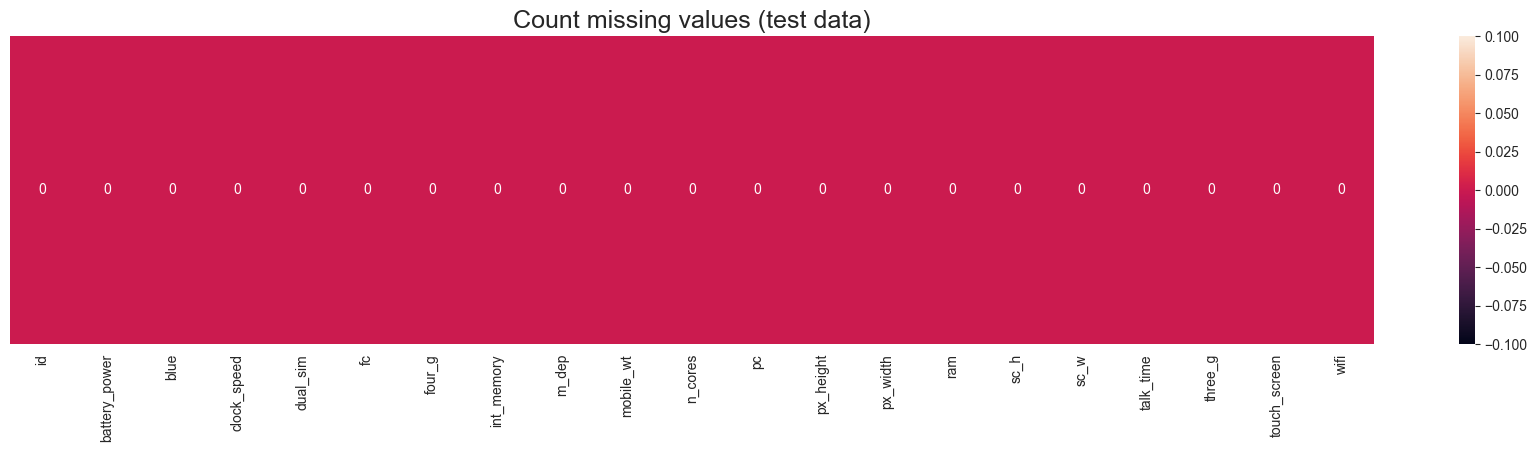

In [16]:
# Missing values (test)
plt.figure(figsize=(22,4))
sns.heatmap((df_test.isna().sum()).to_frame(name='').T, annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)
plt.show()

### Checken voor duplicates

In [17]:
# Duplicated data (train)
df.duplicated().sum()
# Duplicated data (test)
df_test.duplicated().sum()

0

## Overbodige tabellen weghalen. Bv id in test set

In [18]:
df_test.drop(['id'], axis=1, inplace=True)
df_test.shape

(1000, 20)

## Check voor outliers

In [19]:
# Separate numerical and categorical features
num_cols = pd.DataFrame (df, columns= ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])
cat_cols = pd.DataFrame (df, columns= ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'])

In [20]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#6fcfbc', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

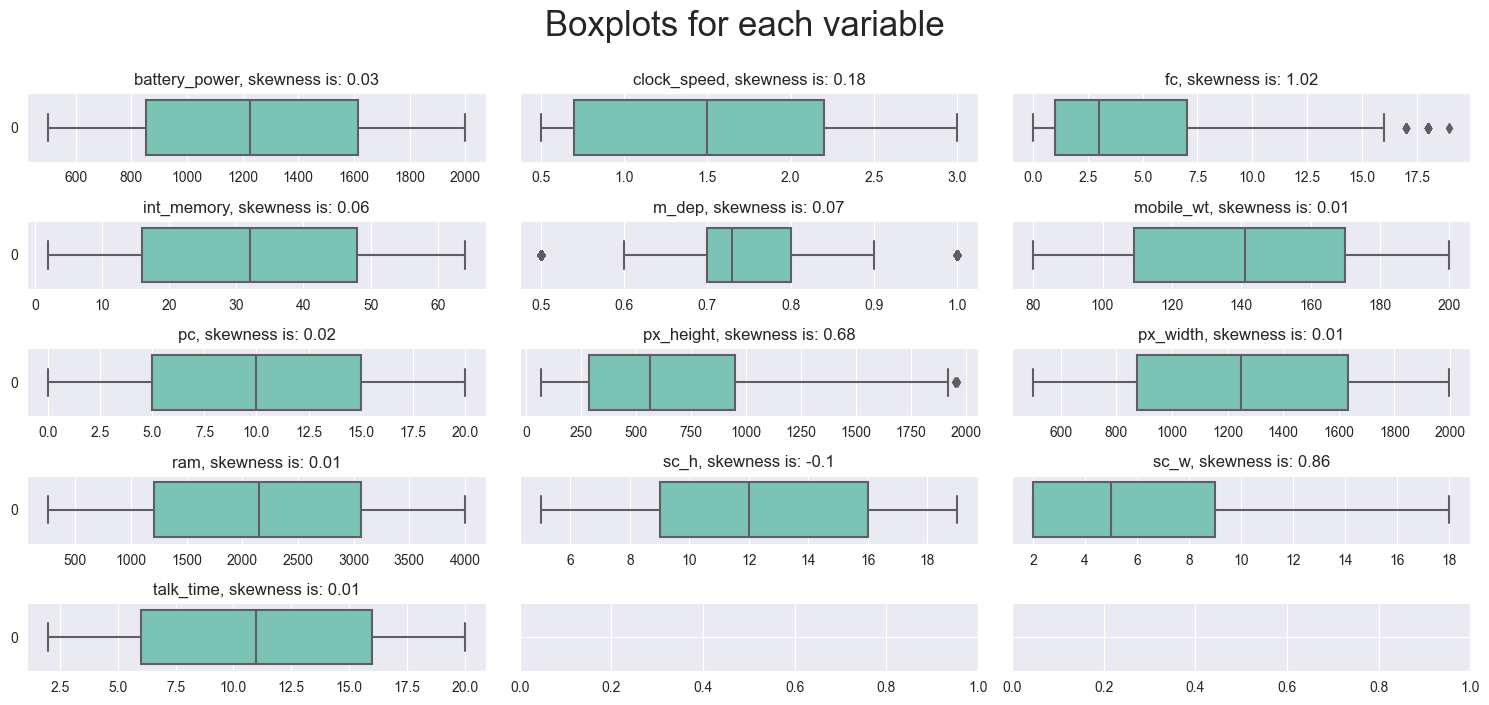

In [21]:
boxplots_custom(dataset=df, columns_list=num_cols, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

m_dep is geen outlier, want dat is de min value dat we zelf hierboven in de code hebben gezet.

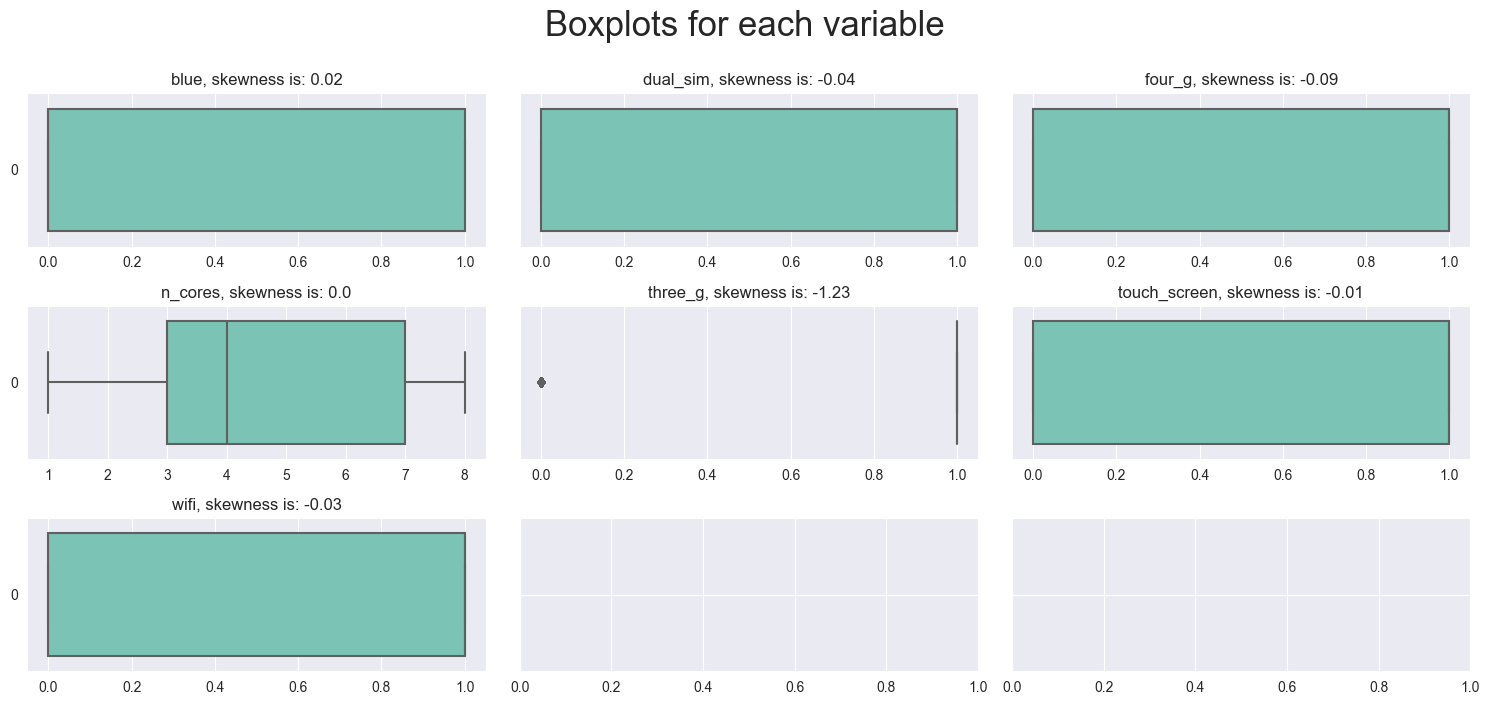

In [22]:
boxplots_custom(dataset=df, columns_list=cat_cols, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

Three G is geen outlier

## Check of de column prijzen wel balanced is.

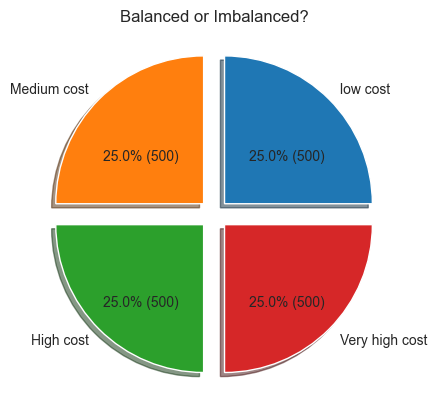

In [23]:
# Count the number of occurrences of each value in the 'price_range' column
value_counts = df['price_range'].value_counts()

# Define the label strings using f-strings
label = [f'{"Very high" if i==3 else "High" if i==2 else "Medium" if i==1 else "low"} cost' for i in range(len(value_counts))]

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True, labels=label)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

Column prijzen is balanced.

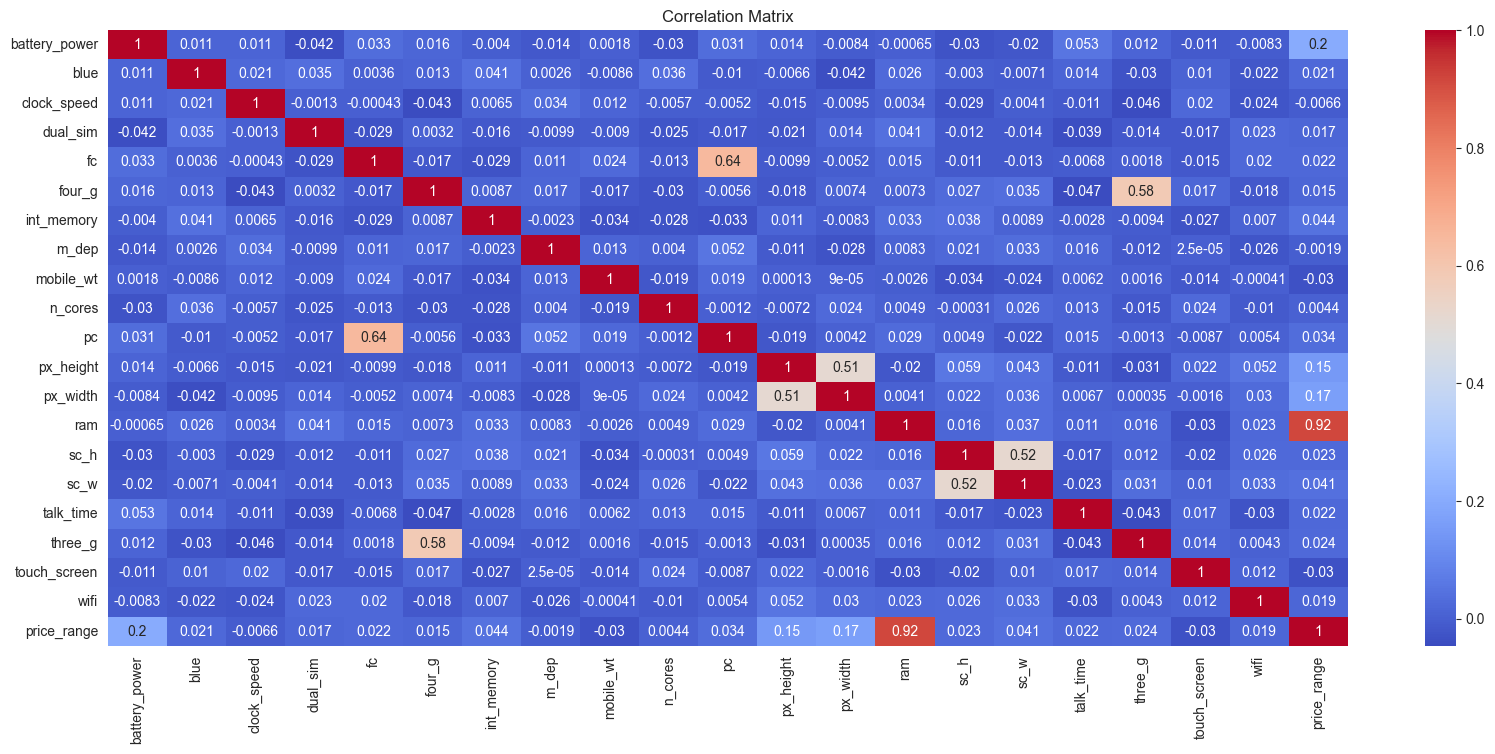

In [24]:
# Bereken correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 8))

# Plot de correlation matrix als een heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax = ax )
plt.title('Correlation Matrix')
plt.show()

### Scattermatrix

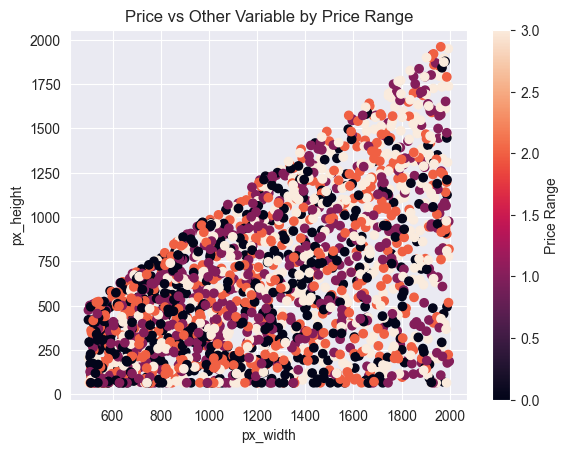

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df["px_width"], df["px_height"], c=df["price_range"])

# Add a colorbar to show the color labels
colorbar = plt.colorbar()
colorbar.set_label('Price Range')

# Add labels and title
plt.xlabel("px_width")
plt.ylabel("px_height")
plt.title("Price vs Other Variable by Price Range")

# Show the chart
plt.show()


Wat opvalt is dat de goedkope smartphones(wit) de kleine afmetingen hebben.

### Model DecisionTree

Decision Tree is een machine learning-algoritme dat wordt gebruikt voor classificatie- en regressietaken. Het creëert een boomachtig model door de gegevens recursief te partitioneren op basis van de meest discriminative features. Decision Tree kan numerieke en categorische gegevens verwerken, is transparant en interpreteerbaar en kan worden gebruikt voor het selecteren van functies.

In [26]:
df2 = df
X = df2.drop('price_range', axis=1)
y = df2['price_range'].values.reshape(-1, 1)

# Check the shape of X and y
print ('X:', X.shape,'\ny:', y.shape)

X: (2000, 20) 
y: (2000, 1)


In [27]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, stratify=y, test_size = 0.25, random_state = 4)

# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train1.shape)
print('X_test shape: ', X_test1.shape)
print('y_train shape: ', y_train1.shape)
print('y_test shape: ', y_test1.shape)

X_train shape:  (1500, 20)
X_test shape:  (500, 20)
y_train shape:  (1500, 1)
y_test shape:  (500, 1)


In [28]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=4)

# Fit the model to the training set
DT_model.fit(X_train1, y_train1)

#predict X_test
y_pred = DT_model.predict(X_test1)

In [29]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DT_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(DT_model.score(X_test1, y_test1)))

Training set score: 0.8333
Test set score: 0.7960


Geen overfitting of underfitting. Omdat de test score erg in de buurt ligt van de training score.

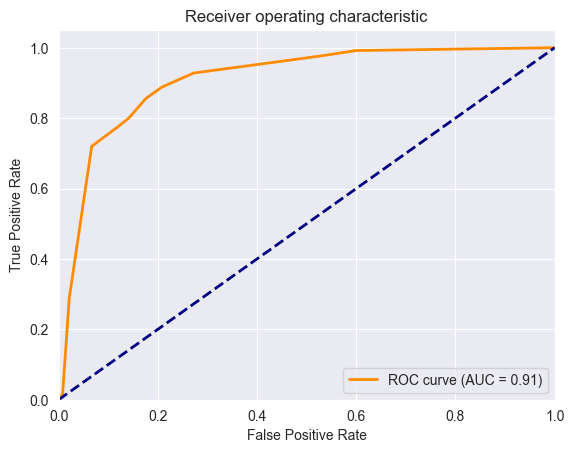

In [30]:
from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities on test set
y_pred_prob = DT_model.predict_proba(X_test1)

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob[:,1], pos_label=1)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## AUC
Area under the curve = 0.92. Dit is een hele goede score.

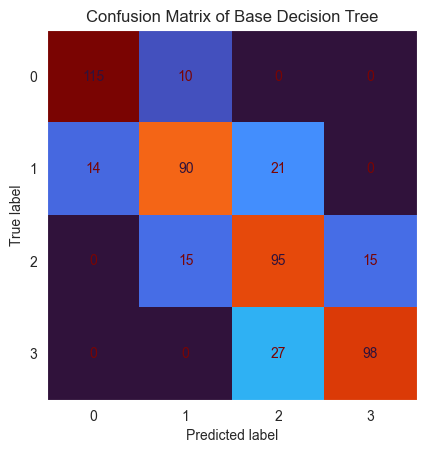

In [31]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False,cmap = 'turbo')
plt.title('Confusion Matrix of Base Decision Tree')
plt.grid(False)

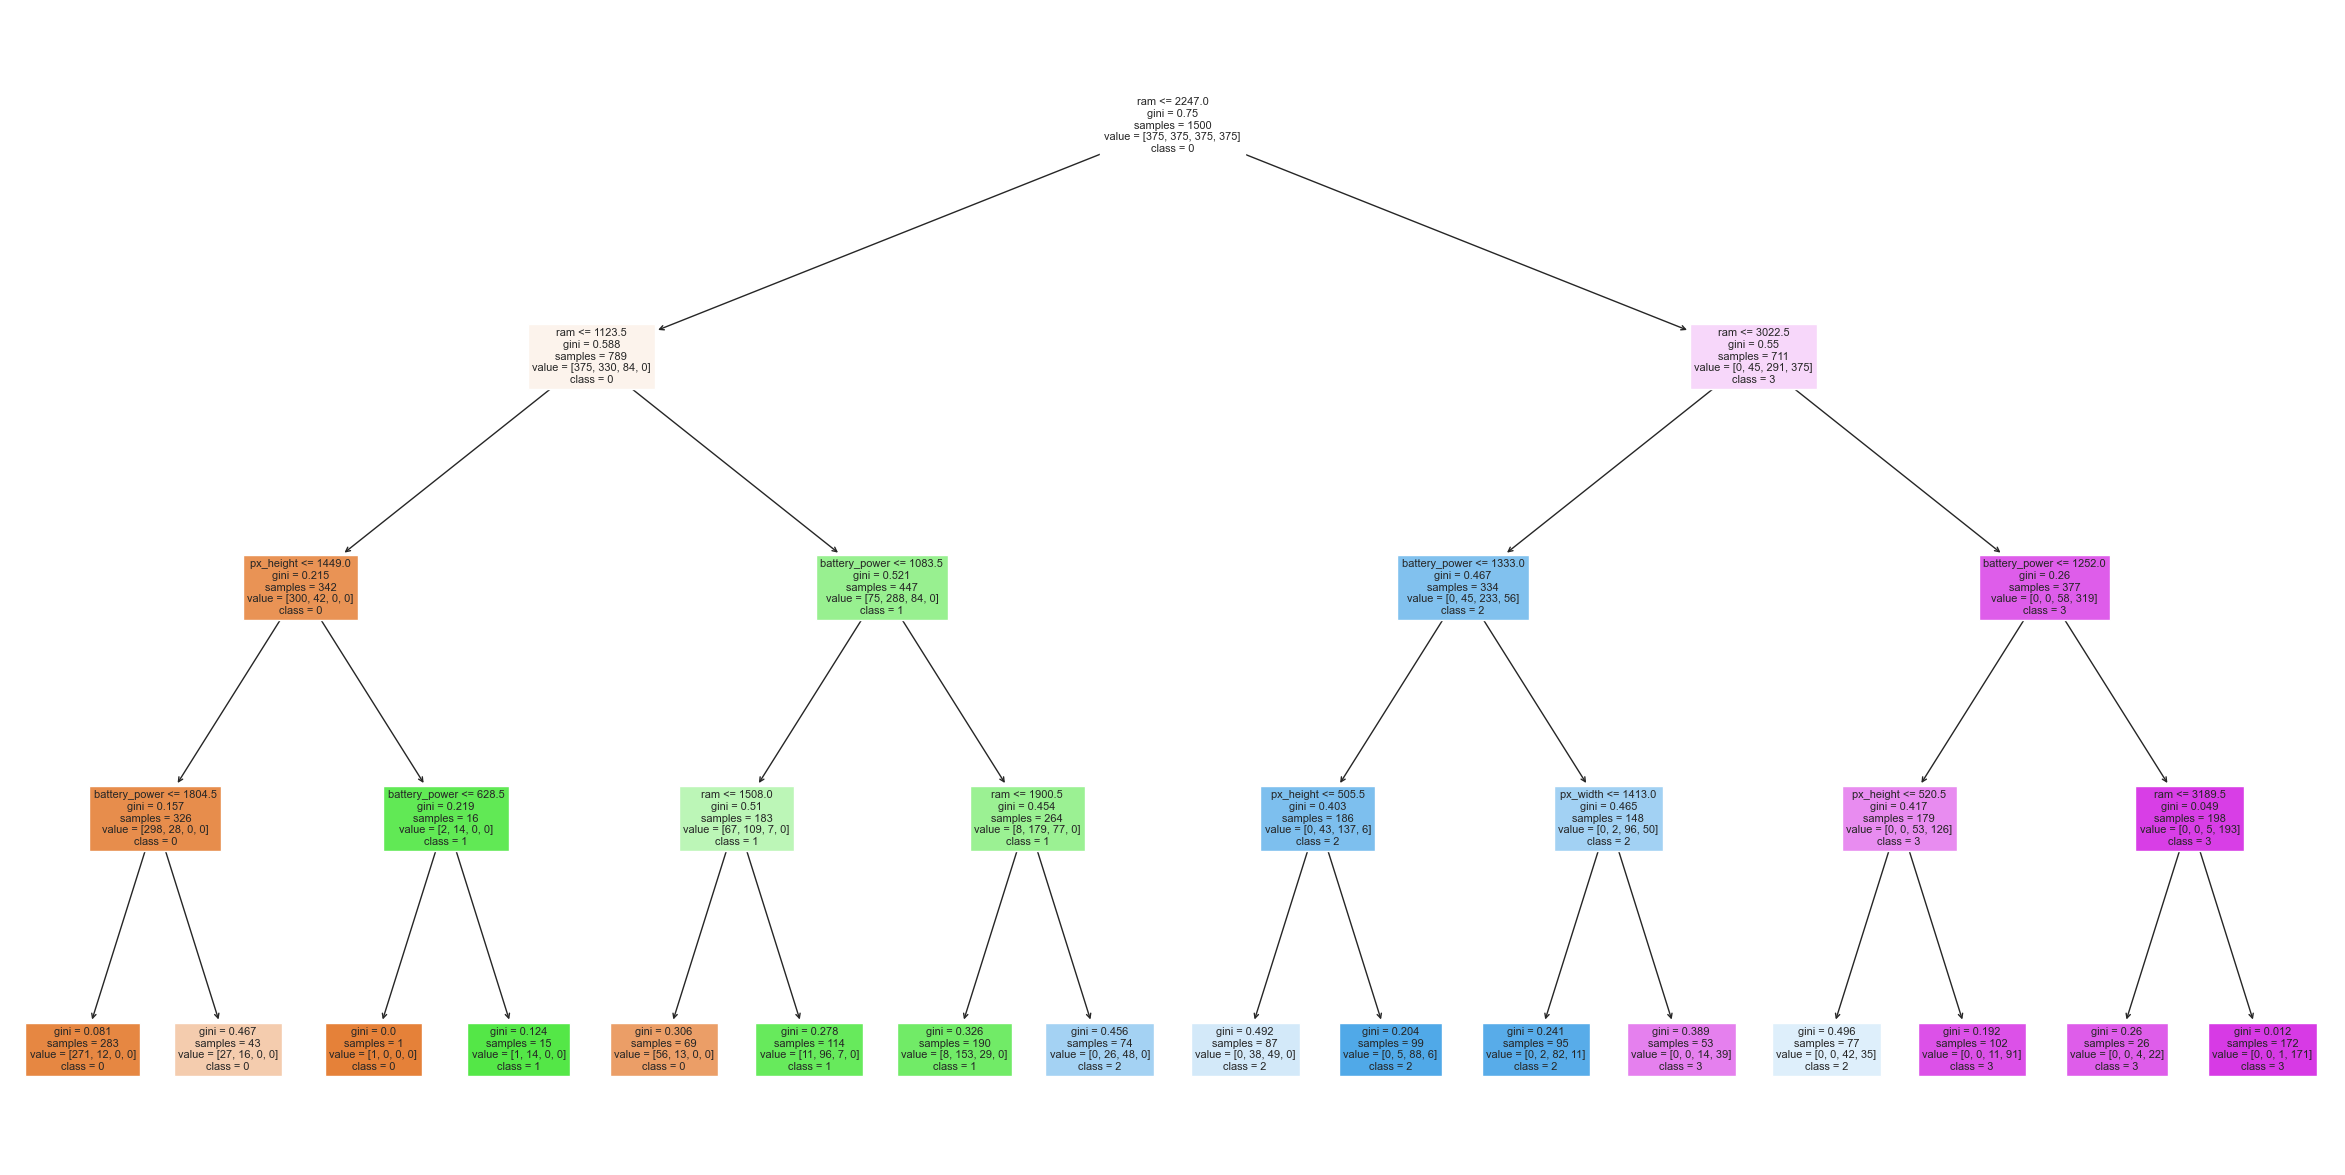

In [32]:
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT_model, feature_names = feature_names, class_names = target_names, filled = True)

Deze code voert een multiklasse classificatie uit met behulp van een beslissingsboom (Decision Tree) model en plot de Receiver Operating Characteristic (ROC) curve voor elke klasse.

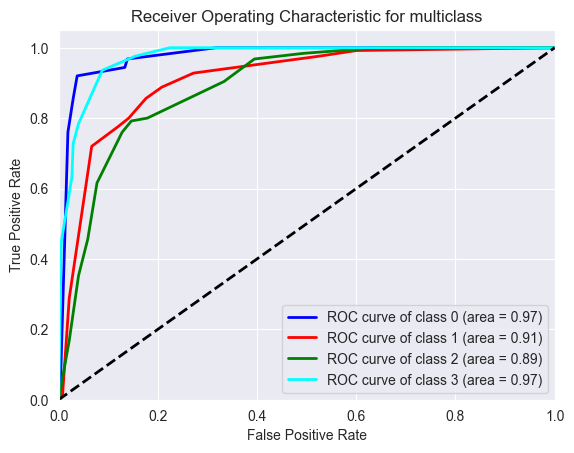

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Predict the probabilities of each class for each test sample
y_scores = DT_model.predict_proba(X_test1)

# Binarize the labels
y_test_bin = label_binarize(y_test1, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green','cyan']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multiclass')
plt.legend(loc="lower right")
plt.show()


### De AUC per class van mobilePrice
we kunnen zien dat het model meer moeite heeft met het voorspellen van mobileprice die gelijk is aan 2. Daar is de AUC het laagst.

SVM

In [34]:
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.60,188,2,...,65,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.73,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.70,108,8,...,868,1632,3057,9,2,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.73,145,5,...,336,670,869,18,10,19,1,1,1,0


In [35]:
X = df2.drop('price_range', axis=1)
y = df2['price_range'].values.reshape(-1, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.975


# Conclusion

Ik heb drie verschillende algoritmes gebruikt om een model te trainen om de prijs van een telefoon te kunnen voorspellen.

### Conclusie DecisionTreeClassifier

Heeft ongeveer een accuracy score van: 0.8. Ik ben het meest te vreden met dit model. Mijn voorkeer gaat naar dit model, omdat je kan zien met de test accuracy dat 0.8 niet overfitting is en ook niet underfitting. De test accuracy is: 0.7980


### Conclusie SVM

Het SVM algoritme heeft uiteindlijk de hoogste accuracy score behaalt. (Score: 0.985, in file: pricePredictionSVM)  Ik ben wel bang dat dit mogelijk overfitting is. Ik heb daarom cross-validation gebruikt zodat ik goed kon zien wat de echte performance is van het model. Het blijft super hoog dus ik vind dat bij het SVM algoritme overfitting voorkomt. Misschien meer data zou dit kunnen oplossen.

### Conclusie Naive Bayes

Naive Bayes algoritme is niet het juiste algoritme voor het voorspellen van de prijs van de telefoon. Dit kan je ook zien aan de accuracy scores. Eerst had ik een normale binary Naive Bayes algoritme gebruikt om mijn model te trainen. Deze gaf een score van 0.255. Dit komt doordat er 4 mogelijke prijs categorieen zijn, dus het classificeren als binary klopt niet.(Meer dan twee opties) Daarom heb ook multinomial Naive Bayes algoritme geprobeerd. Deze had het dubbele meer correct. De score was: 0.547. Hier ben eigenlijk nog steeds niet te vreden mee qua score. Ik denk dat het komt doordat Naive Bayes niet is gemaakt voor wat ik wil doen met mijn dataset.




# Unsupervised Learning
Deze code demonstreert het gebruik van k-means clustering op een dataset genaamd df2 en berekent de silhouette score om de kwaliteit van de clustering te beoordelen

 De silhouette score kan worden gebruikt om te bepalen hoe goed de datapunten binnen hun clusters zijn gegroepeerd en hoe goed de clusters van elkaar zijn gescheiden. Een hogere silhouette score geeft aan dat de clustering beter is.

In [38]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Instantiate k-means model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the model to the data
kmeans.fit(df2)

# Get the cluster labels for each data point
labels = kmeans.predict(df2)

# Calculate the silhouette score
score = silhouette_score(df2, labels)

# Print the silhouette score
print('Silhouette score:', score)



Silhouette score: 0.2779321312267022


Silhouette score: van 0.28 is positief opzich oke. Maar zeker ruimte voor verbetering

In [39]:

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Instantiate k-means model with 3 clusters
kmeans = KMeans(n_clusters=2,n_init=10)

# Fit the model to the data
kmeans.fit(df2)

# Get the cluster labels for each data point
labels = kmeans.predict(df2)

# Calculate the silhouette score
score = silhouette_score(df2, labels)

# Print the silhouette score
print('Silhouette score:', score)

Silhouette score: 0.401593764983889


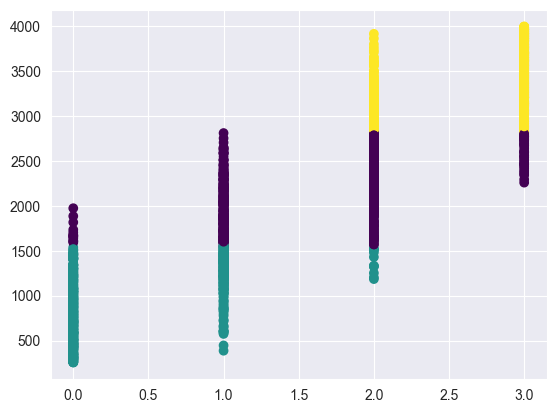

In [40]:
# Preprocess the data
df3 = df[['price_range','ram','wifi','battery_power']]

X = df3.values

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')


plt.show()

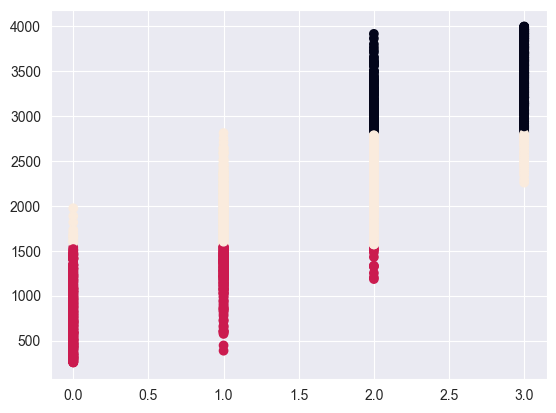

In [41]:
# Preprocess the data
df3 = df[['price_range', 'ram']].copy()  # Make a copy of the DataFrame

X = df3.values

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

# Get the cluster labels for each data point
df3.loc[:, 'kmeans_3'] = kmeans.labels_

plt.scatter(x=df3['price_range'], y=df3['ram'], c=df3['kmeans_3'])
plt.show()
